In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import glob
import pandas as pd

matplotlib.rc('xtick', labelsize=18, direction='in') 
matplotlib.rc('ytick', labelsize=18, direction='in') 
matplotlib.rc('axes', labelsize=18) 

In [2]:
def get_abund(abund_elem,include_fe=True,specific_list=None):
    all_elem = [ [] for _ in range(len(abund_elem)) ]
    all_elem_std = [ [] for _ in range(len(abund_elem)) ]
    feh_all = []
    feh_all_std = []
    if specific_list==None:
        for j in range(len(abund_elem)):
            for i in range(len(smss_list)):
                try:
                    elem_ind = np.where(abund_data[i]['species'] == abund_elem[j])[0][0]
                    elem_temp = abund_data[i].loc[elem_ind,'[X/Fe]']
                    elem_std_temp = abund_data[i].loc[elem_ind,'e_XFe']
                    all_elem[j].append(elem_temp)
                    all_elem_std[j].append(elem_std_temp)
                except IndexError:
                    all_elem[j].append(np.nan)
                    all_elem_std[j].append(np.nan)
        if include_fe:
            for i in range(len(smss_list)):
                feh_ind = np.where(abund_data[i]['species'] == 26.)[0][0]
                feh_temp = abund_data[i].loc[feh_ind,'[X/H]']
                feh_std_temp = abund_data[i].loc[feh_ind,'e_XH']
                feh_all.append(feh_temp)
                feh_all_std.append(feh_std_temp)
    else:
        for j in range(len(abund_elem)):
            for i in range(len(specific_list)):
                try:
                    elem_ind = np.where(abund_data[specific_list[i]]['species'] == abund_elem[j])[0][0]
                    elem_temp = abund_data[specific_list[i]].loc[elem_ind,'[X/Fe]']
                    elem_std_temp = abund_data[i].loc[elem_ind,'e_XFe']
                    all_elem[j].append(elem_temp)
                    all_elem_std[j].append(elem_std_temp)
                except IndexError:
                    all_elem[j].append(np.nan)
                    all_elem_std[j].append(np.nan)
        if include_fe:
            for i in range(len(specific_list)):
                feh_ind = np.where(abund_data[specific_list[i]]['species'] == 26.)[0][0]
                feh_temp = abund_data[specific_list[i]].loc[feh_ind,'[X/H]']
                feh_std_temp = abund_data[i].loc[feh_ind,'e_XH']
                feh_all.append(feh_temp)
                feh_all_std.append(feh_std_temp)
    
    return np.array(all_elem), np.array(feh_all), np.array(all_elem_std), np.array(feh_all_std)

# Write a standard function to extract abundances for any given abundances atomic numbers
def get_eps(abund_elem,eu_ul_names=[],eu_ul_vals=[],include_fe=True,specific_list=None):
    all_elem = [ [] for _ in range(len(abund_elem)) ]
    all_elem_std = [ [] for _ in range(len(abund_elem)) ]
    feh_all = []
    feh_all_std = []
    if specific_list==None:
        for j in range(len(abund_elem)):
            for i in range(len(smss_list)):
                try:
                    elem_ind = np.where(abund_data[i]['species'] == abund_elem[j])[0][0]
                    elem_temp = abund_data[i].loc[elem_ind,'logeps_w']
                    elem_std_temp = abund_data[i].loc[elem_ind,'stderr_w']
                    all_elem[j].append(elem_temp)
                    all_elem_std[j].append(elem_std_temp)
                except IndexError:
                    all_elem[j].append(np.nan)
                    all_elem_std[j].append(np.nan)
        if include_fe:
            for i in range(len(smss_list)):
                feh_ind = np.where(abund_data[i]['species'] == 26.)[0][0]
                feh_temp = abund_data[i].loc[feh_ind,'logeps_w']
                feh_std_temp = abund_data[i].loc[feh_ind,'stderr_w']
                feh_all.append(feh_temp)
                feh_all_std.append(feh_std_temp)
    else:
        for j in range(len(abund_elem)):
            for i in range(len(specific_list)):
                try:
                    elem_ind = np.where(abund_data[specific_list[i]]['species'] == abund_elem[j])[0][0]
                    elem_temp = abund_data[specific_list[i]].loc[elem_ind,'logeps_w']
                    elem_std_temp = abund_data[i].loc[elem_ind,'stderr_w']
                    all_elem[j].append(elem_temp)
                    all_elem_std[j].append(elem_std_temp)
                except IndexError:
                    all_elem[j].append(np.nan)
                    all_elem_std[j].append(np.nan)
        if include_fe:
            for i in range(len(specific_list)):
                feh_ind = np.where(abund_data[specific_list[i]]['species'] == 26.)[0][0]
                feh_temp = abund_data[specific_list[i]].loc[feh_ind,'logeps_w']
                feh_std_temp = abund_data[i].loc[feh_ind,'stderr_w']
                feh_all.append(feh_temp)
                feh_all_std.append(feh_std_temp)
    
    return np.array(all_elem), np.array(feh_all), np.array(all_elem_std), np.array(feh_all_std)

In [2]:
# Write a standard function to extract abundances for any given abundances atomic numbers
# Old version with manual input of Eu upper limits
# def get_abund(abund_elem,eu_ul_names=[],eu_ul_vals=[],include_fe=True,specific_list=None):
#     all_elem = [ [] for _ in range(len(abund_elem)) ]
#     all_elem_std = [ [] for _ in range(len(abund_elem)) ]
#     feh_all = []
#     feh_all_std = []
#     if specific_list==None:
#         for j in range(len(abund_elem)):
#             for i in range(len(smss_list)):
#                 try:
#                     elem_ind = np.where(abund_data[i]['species'] == abund_elem[j])[0][0]
#                     elem_temp = abund_data[i].loc[elem_ind,'[X/Fe]']
#                     elem_std_temp = abund_data[i].loc[elem_ind,'stdev']
#                     all_elem[j].append(elem_temp)
#                     all_elem_std[j].append(elem_std_temp)
#                 except IndexError:
#                     # Add in Eu upper limits manually
#                     if (abund_name[i] in eu_ul_names) and (abund_elem[j] == 63.1):
#                         eu_ind = np.where(eu_ul_names == abund_name[i])[0][0]
#                         all_elem[j].append(eu_ul_vals[eu_ind])
#                     else:
#                         all_elem[j].append(np.nan)
#                     all_elem_std[j].append(np.nan)
#         if include_fe:
#             for i in range(len(smss_list)):
#                 feh_ind = np.where(abund_data[i]['species'] == 26.)[0][0]
#                 feh_temp = abund_data[i].loc[feh_ind,'[X/H]']
#                 feh_std_temp = abund_data[i].loc[feh_ind,'stdev']
#                 feh_all.append(feh_temp)
#                 feh_all_std.append(feh_std_temp)
#     else:
#         for j in range(len(abund_elem)):
#             for i in range(len(specific_list)):
#                 try:
#                     elem_ind = np.where(abund_data[specific_list[i]]['species'] == abund_elem[j])[0][0]
#                     elem_temp = abund_data[specific_list[i]].loc[elem_ind,'[X/Fe]']
#                     elem_std_temp = abund_data[i].loc[elem_ind,'stdev']
#                     all_elem[j].append(elem_temp)
#                     all_elem_std[j].append(elem_std_temp)
#                 except IndexError:
#                     # Add in Eu upper limits manually
#                     if (specific_list[i] in eu_ul_names) and (abund_elem[j] == 63.1):
#                         eu_ind = np.where(eu_ul_names == specific_list[i])[0][0]
#                         all_elem[j].append(eu_ul_vals[eu_ind])
#                     else:
#                         all_elem[j].append(np.nan)
#                     all_elem_std[j].append(np.nan)
#         if include_fe:
#             for i in range(len(specific_list)):
#                 feh_ind = np.where(abund_data[specific_list[i]]['species'] == 26.)[0][0]
#                 feh_temp = abund_data[specific_list[i]].loc[feh_ind,'[X/H]']
#                 feh_std_temp = abund_data[i].loc[feh_ind,'stdev']
#                 feh_all.append(feh_temp)
#                 feh_all_std.append(feh_std_temp)
    
#     return np.array(all_elem), np.array(feh_all), np.array(all_elem_std), np.array(feh_all_std)

# Write a standard function to extract abundances for any given abundances atomic numbers
# def get_eps(abund_elem,eu_ul_names=[],eu_ul_vals=[],include_fe=True,specific_list=None):
#     all_elem = [ [] for _ in range(len(abund_elem)) ]
#     all_elem_std = [ [] for _ in range(len(abund_elem)) ]
#     feh_all = []
#     feh_all_std = []
#     if specific_list==None:
#         for j in range(len(abund_elem)):
#             for i in range(len(smss_list)):
#                 try:
#                     elem_ind = np.where(abund_data[i]['species'] == abund_elem[j])[0][0]
#                     elem_temp = abund_data[i].loc[elem_ind,'logeps']
#                     elem_std_temp = abund_data[i].loc[elem_ind,'stdev']
#                     all_elem[j].append(elem_temp)
#                     all_elem_std[j].append(elem_std_temp)
#                 except IndexError:
#                     # Add in Eu upper limits manually
#                     if (abund_name[i] in eu_ul_names) and (abund_elem[j] == 63.1):
#                         eu_ind = np.where(eu_ul_names == abund_name[i])[0][0]
#                         all_elem[j].append(eu_ul_vals[eu_ind])
#                     else:
#                         all_elem[j].append(np.nan)
#                     all_elem_std[j].append(np.nan)
#         if include_fe:
#             for i in range(len(smss_list)):
#                 feh_ind = np.where(abund_data[i]['species'] == 26.)[0][0]
#                 feh_temp = abund_data[i].loc[feh_ind,'logeps']
#                 feh_std_temp = abund_data[i].loc[feh_ind,'stdev']
#                 feh_all.append(feh_temp)
#                 feh_all_std.append(feh_std_temp)
#     else:
#         for j in range(len(abund_elem)):
#             for i in range(len(specific_list)):
#                 try:
#                     elem_ind = np.where(abund_data[specific_list[i]]['species'] == abund_elem[j])[0][0]
#                     elem_temp = abund_data[specific_list[i]].loc[elem_ind,'logeps']
#                     elem_std_temp = abund_data[i].loc[elem_ind,'stdev']
#                     all_elem[j].append(elem_temp)
#                     all_elem_std[j].append(elem_std_temp)
#                 except IndexError:
#                     # Add in Eu upper limits manually
#                     if (specific_list[i] in eu_ul_names) and (abund_elem[j] == 63.1):
#                         eu_ind = np.where(eu_ul_names == specific_list[i])[0][0]
#                         all_elem[j].append(eu_ul_vals[eu_ind])
#                     else:
#                         all_elem[j].append(np.nan)
#                     all_elem_std[j].append(np.nan)
#         if include_fe:
#             for i in range(len(specific_list)):
#                 feh_ind = np.where(abund_data[specific_list[i]]['species'] == 26.)[0][0]
#                 feh_temp = abund_data[specific_list[i]].loc[feh_ind,'logeps']
#                 feh_std_temp = abund_data[i].loc[feh_ind,'stdev']
#                 feh_all.append(feh_temp)
#                 feh_all_std.append(feh_std_temp)
    
#     return np.array(all_elem), np.array(feh_all), np.array(all_elem_std), np.array(feh_all_std)

In [8]:
# Import my data
smss_list = glob.glob("../data/mwtd_abund_err_1121/*")

# List the desired elem and create an empty list
abund_elem = [12.0, 13.0, 14.0, 20.0, 21.1, 22.1, 24.0, 25.0, 
              38.1, 39.1, 40.1, 56.1, 57.1, 58.1, 60.1, 62.1, 63.1, 106.0]
abund_labels = ['[Mg I/Fe]','[Al I/Fe]','[Si I/Fe]','[Ca I/Fe]','[Sc II/Fe]','[Ti II/Fe]','[Cr I/Fe]',
                '[Mn I/Fe]','[Sr II/Fe]','[Y II/Fe]','[Zr II/Fe]','[Ba II/Fe]','[La II/Fe]','[Ce II/Fe]',
                '[Nd II/Fe]','[Sm II/Fe]','[Eu II/Fe]','[C/Fe]']

# Add in the Eu upper limits manually; in [Eu/Fe]
smss_mwtd_eu_ul_names = np.array(['smss753'])
# smss_mwtd_eu_ul_xfe = np.array([0.27,-0.27])
# smss_mwtd_eu_ul_xh = np.array([-2.37,-2.88])
# smss_mwtd_eu_ul_logeps = np.array([-1.85,-2.36])

abund_name = []
abund_data = []

for i in range(len(smss_list)):
    # Read the name of the star
    name = smss_list[i][28:-14]
    # Read the abundances [X/Fe] and the total error
#     temp_smss = pd.read_csv(smss_list[i],skiprows=[1],delim_whitespace=True)
    temp_smss = pd.read_fwf(smss_list[i],skiprows=[1])
    
    # Store them 
    abund_name.append(name)
    abund_data.append(temp_smss)

abund_name = np.array(abund_name)
print(abund_name)

smss_mwtd_eu_ul_ind = np.array([np.where(abund_name == eu_ul_name)[0] for eu_ul_name in smss_mwtd_eu_ul_names]).T[0]

# Extracting final abundances for all stars
all_elem, feh_all, all_elem_std, feh_all_std = get_abund(abund_elem)
all_eps, eps_fe_all, all_eps_std, eps_fe_all_std = get_eps(abund_elem)

['smss1_33' 'smss653' 'smss753' 'smss1_29' 'smss697']


In [9]:
print(abund_name)
print(all_eps[16,:])

['smss1_33' 'smss653' 'smss753' 'smss1_29' 'smss697']
[-1.783 -1.577 -2.621 -0.837 -1.6  ]


In [10]:
# Import the r-process pattern
solar = pd.read_csv('../data/r_proc_pattern/solar_r_s_fractions.dat',delim_whitespace=True,
                    names=['elem','Z','rproc','sproc','total','rfrac','sfrac'])

# elem2Z = dict(zip(solar["elem"],solar["Z"]))
# Z2elem = dict(zip(solar["Z"],solar["elem"]))
# elem2r = dict(zip(solar["elem"],solar["rproc"]))
# elem2s = dict(zip(solar["elem"],solar["sproc"]))

# full_r = []
# full_s = []
# Zet = []

# for x in elem2r:
#     full_r.append(elem2r[x])
#     full_s.append(elem2s[x])
#     Zet.append(elem2Z[x])
    
# iy = np.argsort(Zet) 
# Zet = np.array(Zet)[iy]    
# full_r = np.array(full_r)[iy]
# full_s = np.array(full_s)[iy]

# eps_r = np.log10(full_r)
# eps_s = np.log10(full_s)

solar['eps_r'] = np.log10(solar['rproc'])
solar['eps_s'] = np.log10(solar['sproc'])

/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


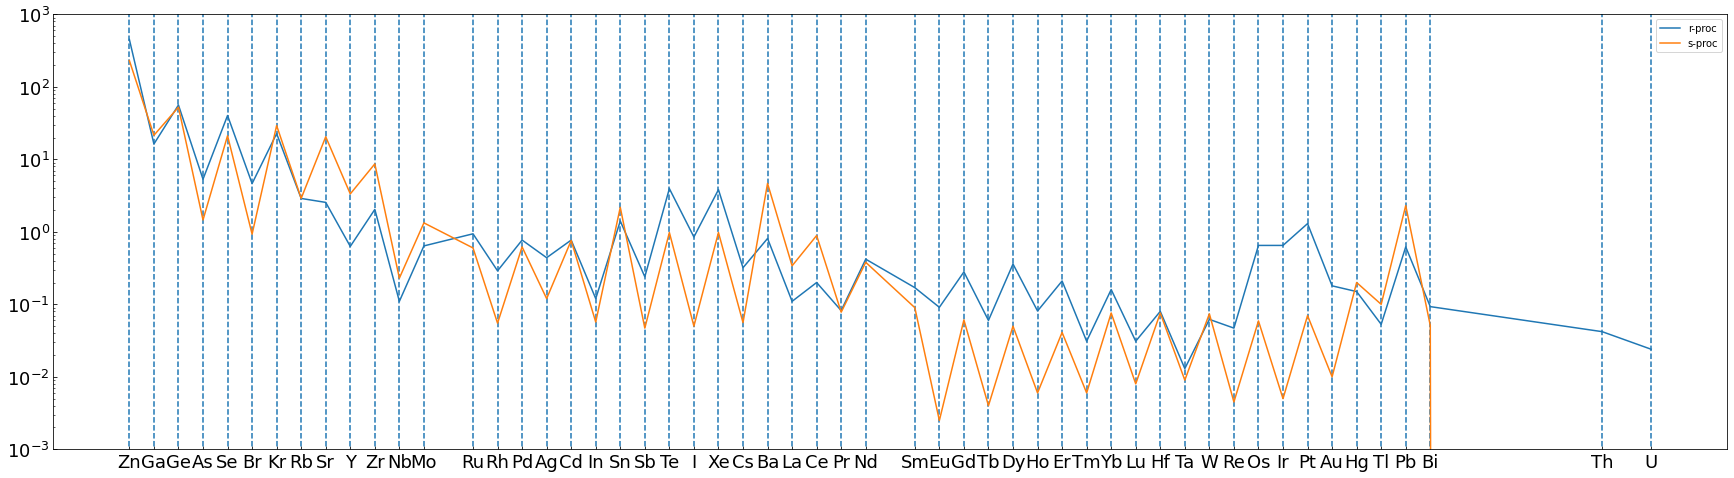

In [11]:
### Plot the solar pattern
f = plt.figure(figsize=[30,8])
plt.plot(solar['Z'], solar['rproc'],label='r-proc')
plt.plot(solar['Z'], solar['sproc'],label='s-proc')
plt.xticks(solar['Z'], solar['elem'])
plt.yscale('log')
plt.vlines(solar['Z'],0,1000,linestyles='dashed')
plt.ylim([10**-3,10**3])
plt.legend()
plt.show()

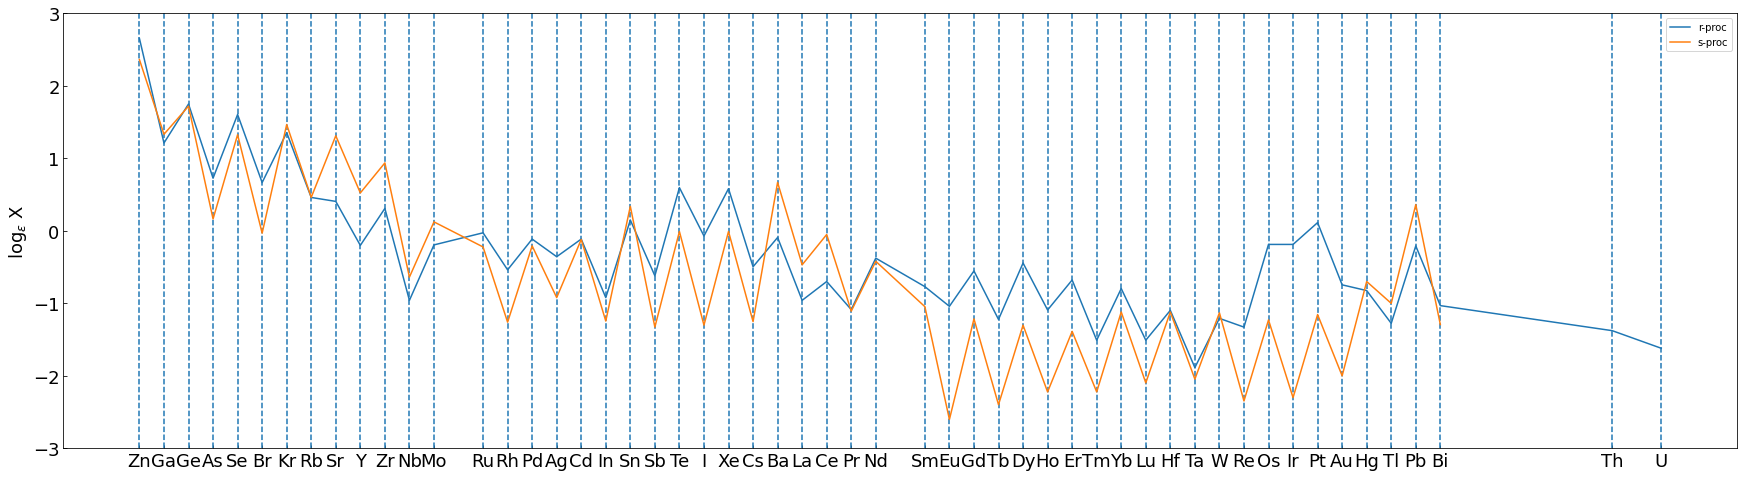

In [12]:
### Plot the solar pattern
f = plt.figure(figsize=[30,8])
plt.plot(solar['Z'], solar['eps_r'],label='r-proc')
plt.plot(solar['Z'], solar['eps_s'],label='s-proc')
plt.xticks(solar['Z'], solar['elem'])
plt.vlines(solar['Z'],-3,3,linestyles='dashed')
plt.ylim([-3,3])
plt.ylabel(r'$\log_{\epsilon}$ X')
plt.legend()
plt.show()

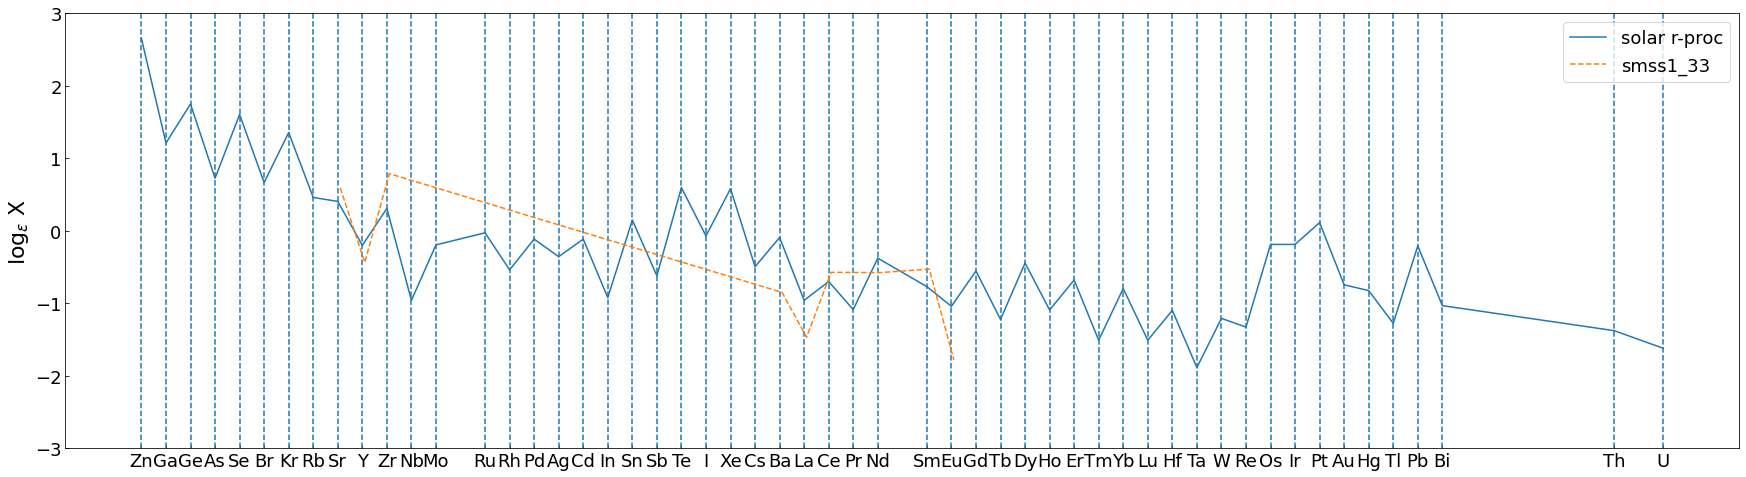

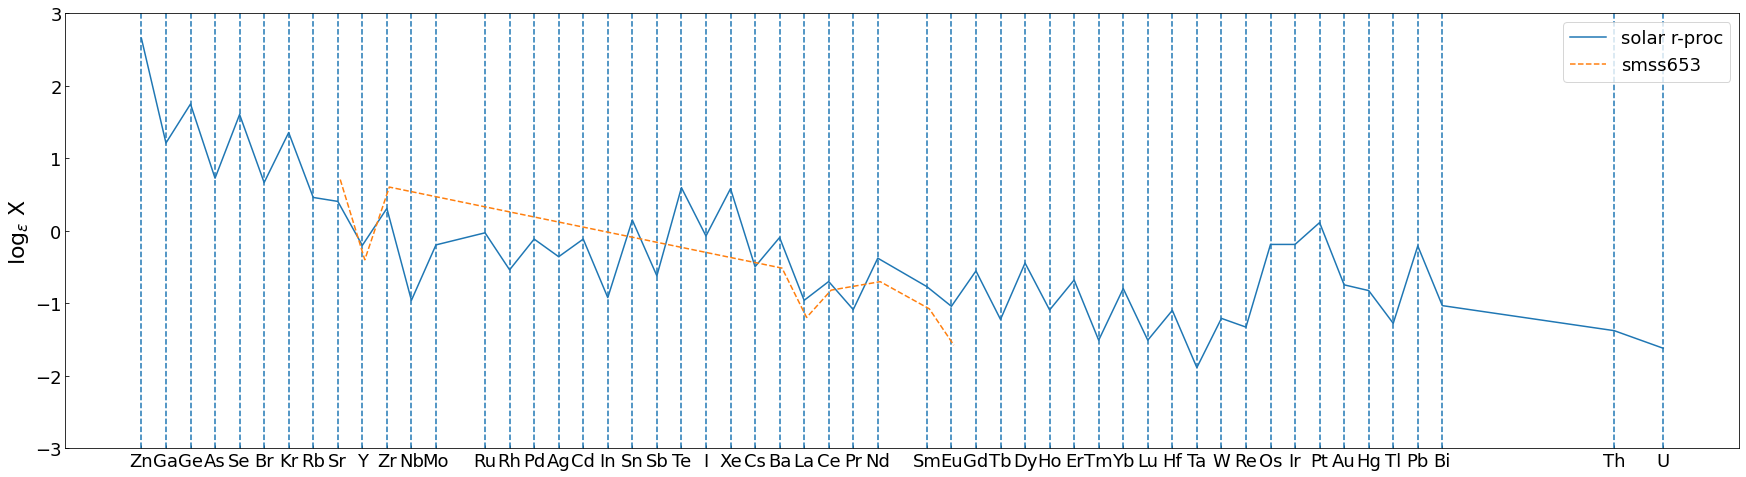

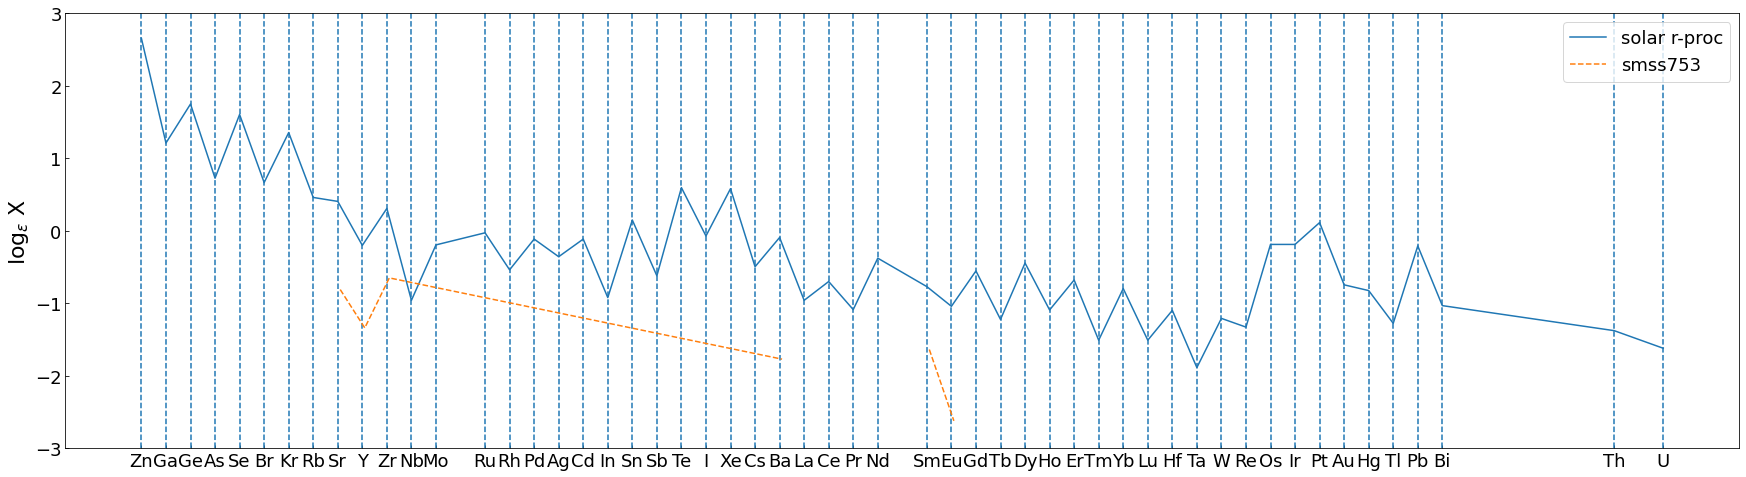

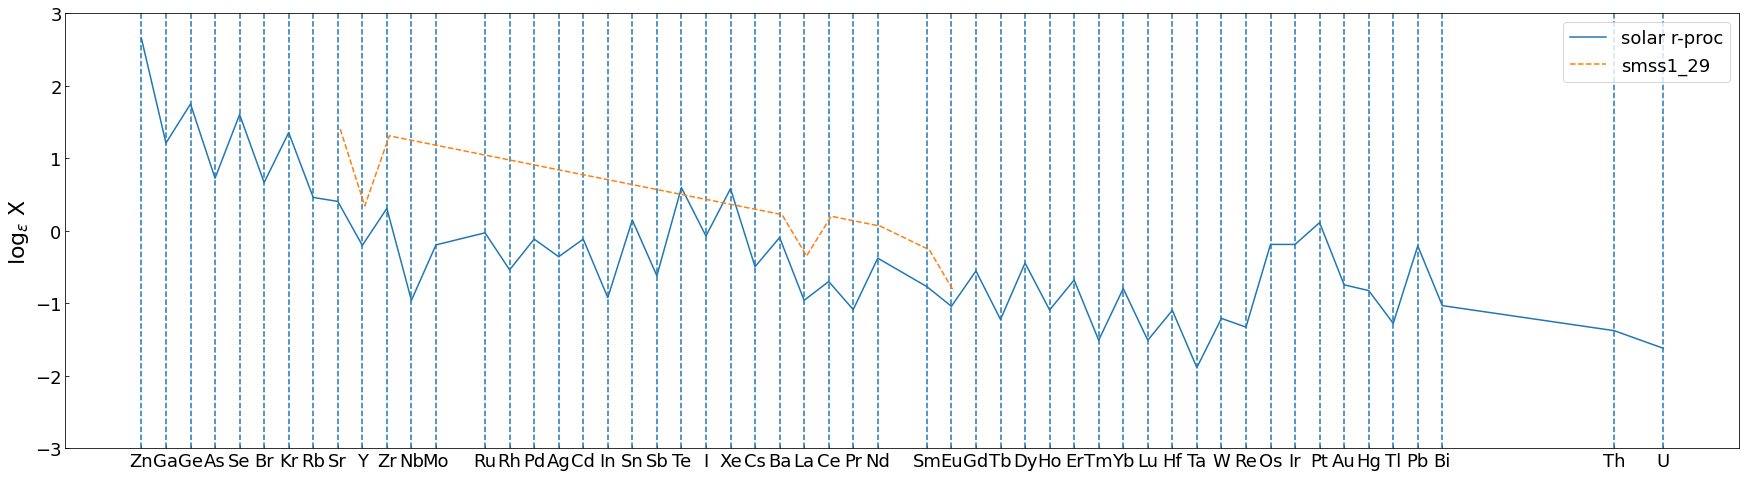

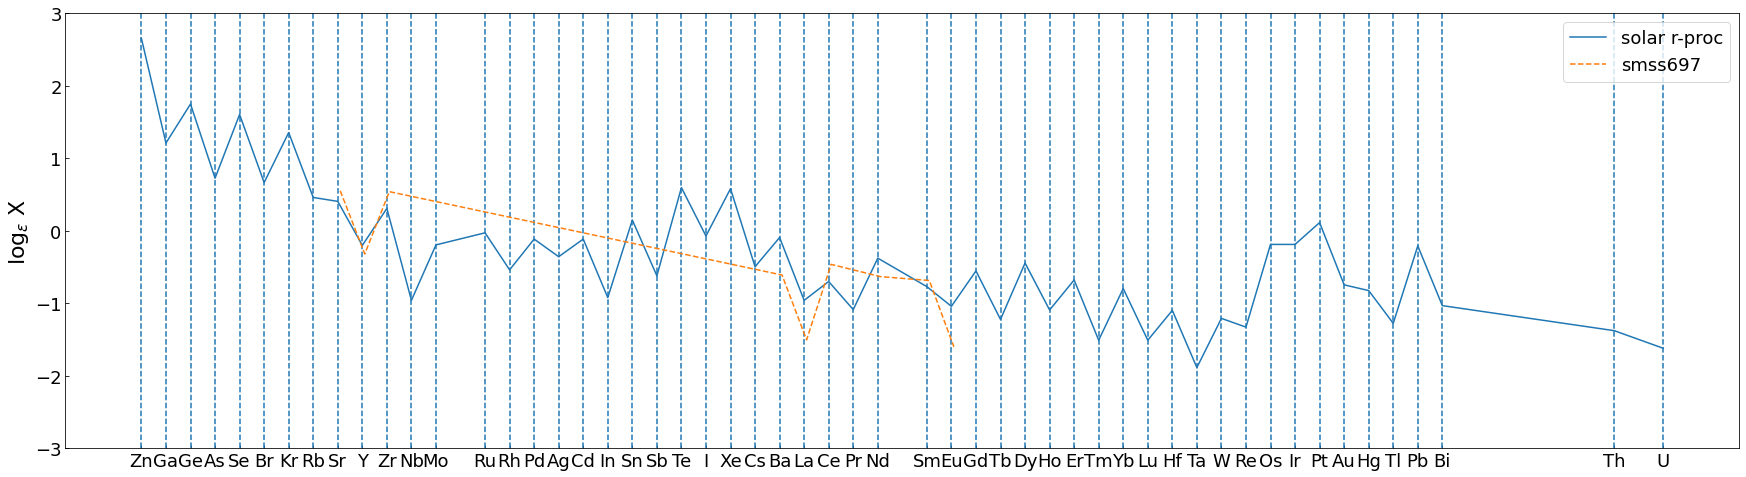

In [13]:
# Plot my star
for i in range(len(abund_name)):
    plot_elem_range = list(np.arange(8,17))
    f = plt.figure(figsize=[30,8])
    plt.plot(solar['Z'], solar['eps_r'],label='solar r-proc')
    # plt.plot(solar['Z'], solar['eps_s'],label='s-proc')
    plt.plot(np.array(abund_elem)[plot_elem_range], all_eps[plot_elem_range,i], label=abund_name[i],ls='--')
    plt.xticks(solar['Z'], solar['elem'])
    plt.vlines(solar['Z'],-3,3,linestyles='dashed')
    # plt.xlim([])
    plt.ylim([-3,3])
    plt.ylabel(r'$\log_{\epsilon}$ X',fontsize=22)
    plt.legend(fontsize=18)
    plt.show()

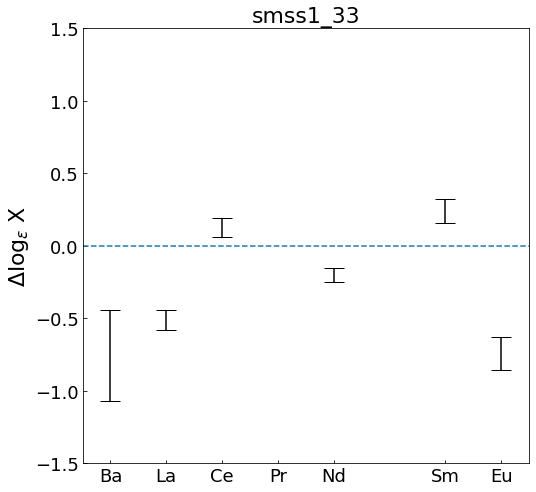

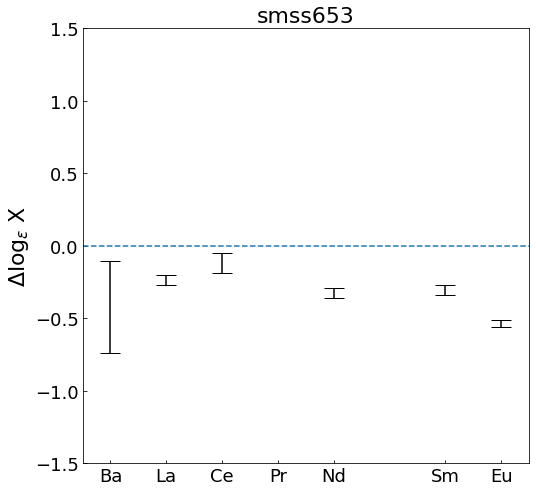

/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


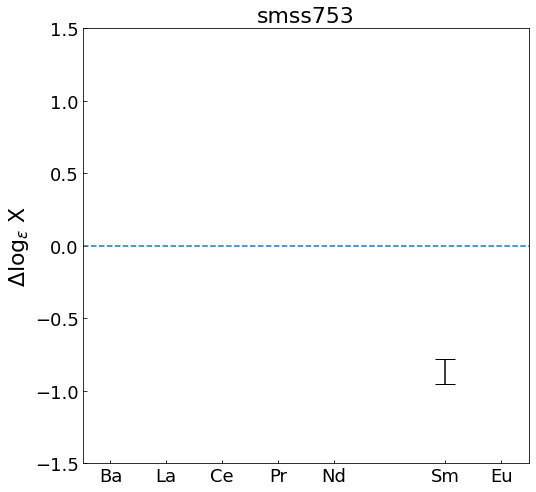

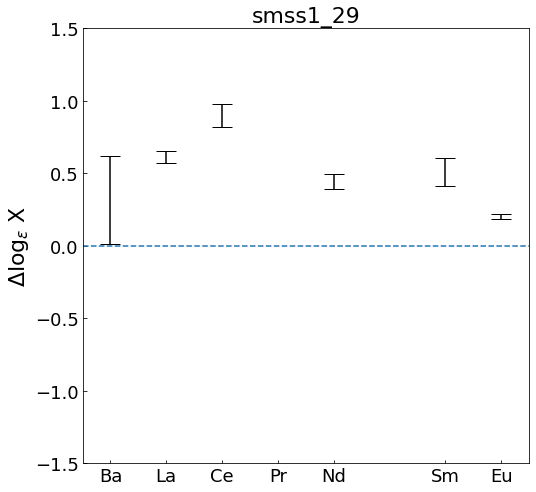

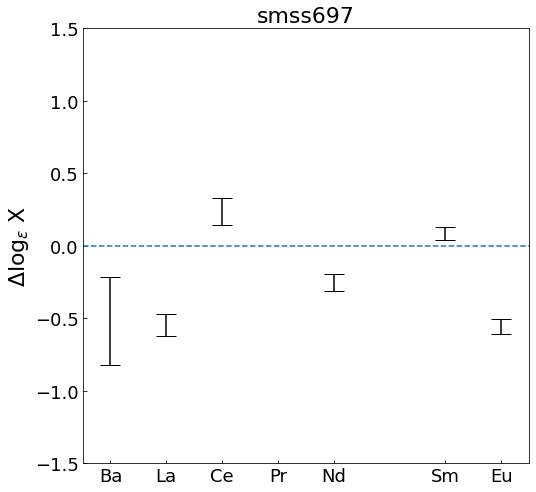

In [14]:
# Plot the differences
for i in range(len(abund_name)):
    plot_elem_range = list(np.arange(11,17))
    f = plt.figure(figsize=[8,8])
    for j in range(len(plot_elem_range)):
        Z_tmp = int(np.array(abund_elem)[plot_elem_range[j]])
        ind_tmp = np.where(solar['Z'] == Z_tmp)[0][0]
        plt.errorbar(Z_tmp, all_eps[plot_elem_range[j],i]-solar['eps_r'][ind_tmp],yerr=all_eps_std[plot_elem_range[j],i],
                     markersize=10,c='k',capsize=10)
    plt.xticks(solar['Z'], solar['elem'])
    # plt.vlines(solar['Z'],-3,3,linestyles='dashed')
    plt.xlim([55.5,63.5])
    plt.title(abund_name[i],fontsize=22)
    plt.ylim([-1.5,1.5])
    plt.axhline(0,ls='--')
    plt.ylabel(r'$\Delta \log_{\epsilon}$ X',fontsize=22)
#     plt.legend(fontsize=18)
    plt.show()

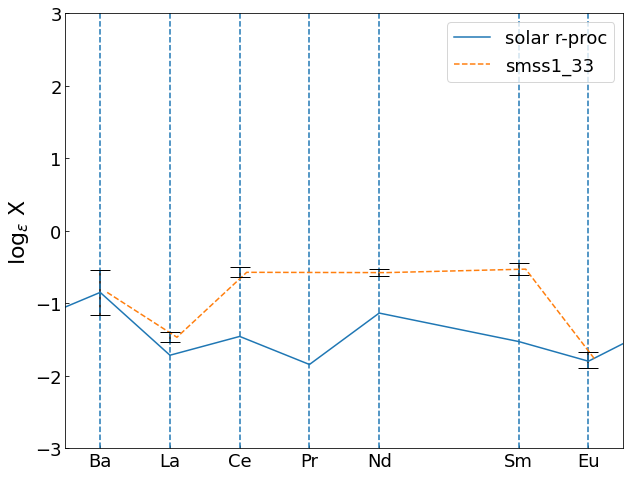

<ipython-input-15-7bc93e1ba6d6>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/ba_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')


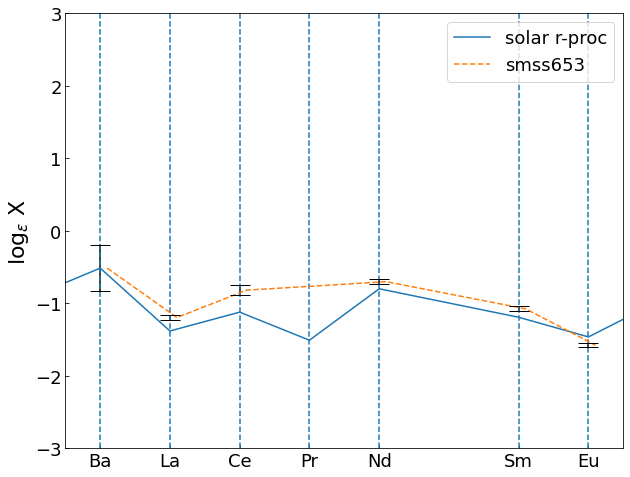

<ipython-input-15-7bc93e1ba6d6>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/ba_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: conv

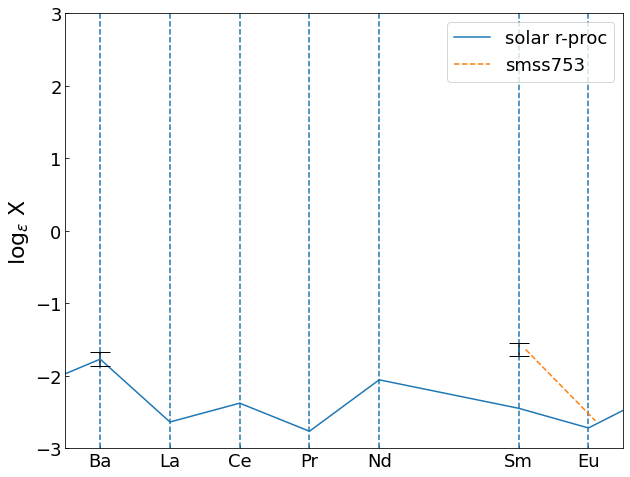

<ipython-input-15-7bc93e1ba6d6>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/ba_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')


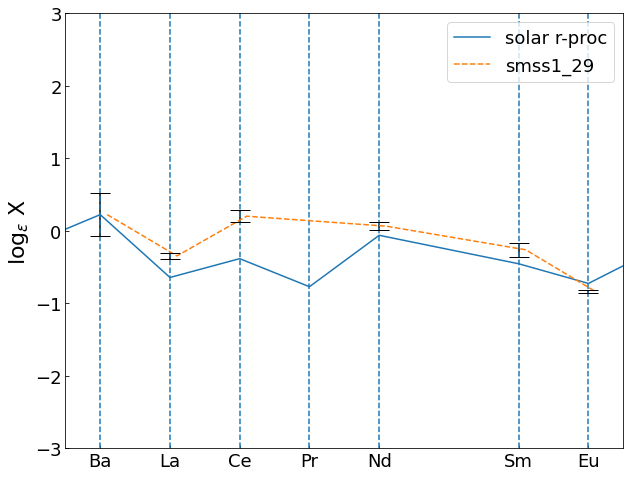

<ipython-input-15-7bc93e1ba6d6>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/ba_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')


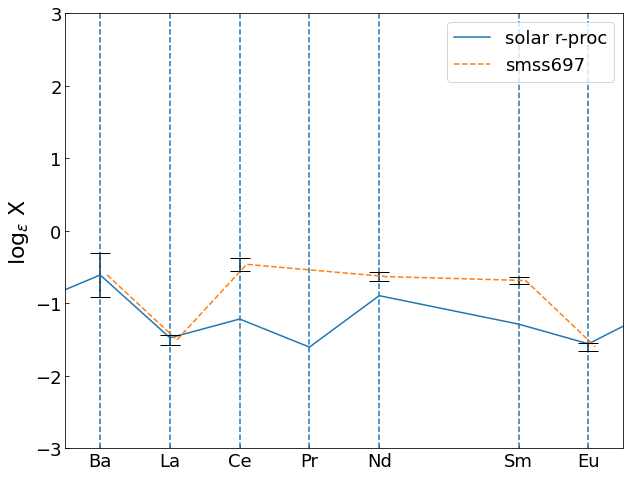

<ipython-input-15-7bc93e1ba6d6>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/ba_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')


In [15]:
# Plot my star with scale shifted based on Ba
for i in range(len(abund_name)):
    plot_elem_range = list(np.arange(11,17))
    f = plt.figure(figsize=[10,8])
    # plt.plot(solar['Z'], solar['eps_s'],label='s-proc')
    # Calculate the shift needed for Ba
    Z_tmp = int(np.array(abund_elem)[11])
    ind_tmp = np.where(solar['Z'] == Z_tmp)[0][0]
    scale_shift = all_eps[11,i]-solar['eps_r'][ind_tmp]
    plt.plot(solar['Z'], solar['eps_r']+scale_shift,label='solar r-proc')
#     print(scale_shift)
    plt.plot(np.array(abund_elem)[plot_elem_range], all_eps[plot_elem_range,i], label=abund_name[i],ls='--')
    for j in range(len(plot_elem_range)):
        Z_tmp = int(np.array(abund_elem)[plot_elem_range[j]])
        ind_tmp = np.where(solar['Z'] == Z_tmp)[0][0]
        plt.errorbar(Z_tmp, all_eps[plot_elem_range[j],i],yerr=all_eps_std[plot_elem_range[j],i],
                     markersize=10,c='k',capsize=10)
    plt.xticks(solar['Z'], solar['elem'])
    plt.vlines(solar['Z'],-3,3,linestyles='dashed')
    plt.xlim([55.5,63.5])
    plt.ylim([-3,3])
    plt.ylabel(r'$\log_{\epsilon}$ X',fontsize=22)
    plt.legend(fontsize=18)
    plt.show()
    f.savefig('r_proc_pattern/ba_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')

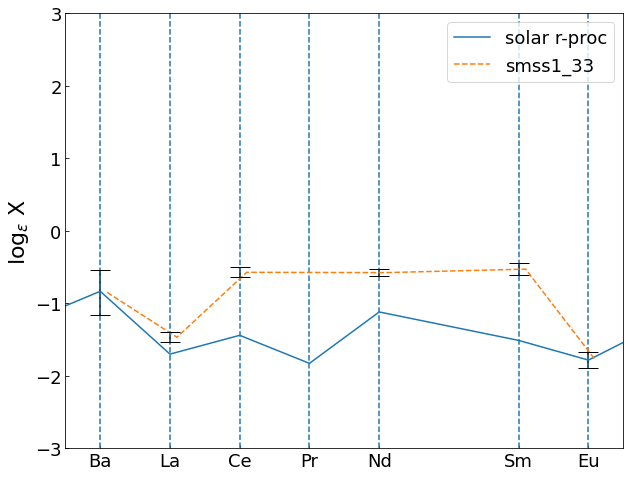

<ipython-input-16-01d5c364d05f>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/eu_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')


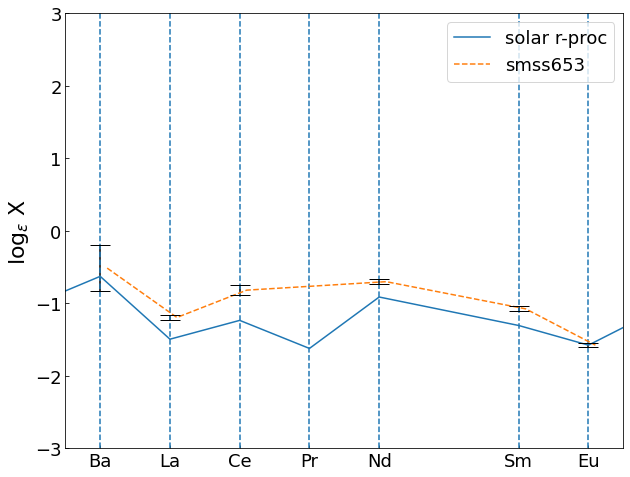

<ipython-input-16-01d5c364d05f>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/eu_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: conv

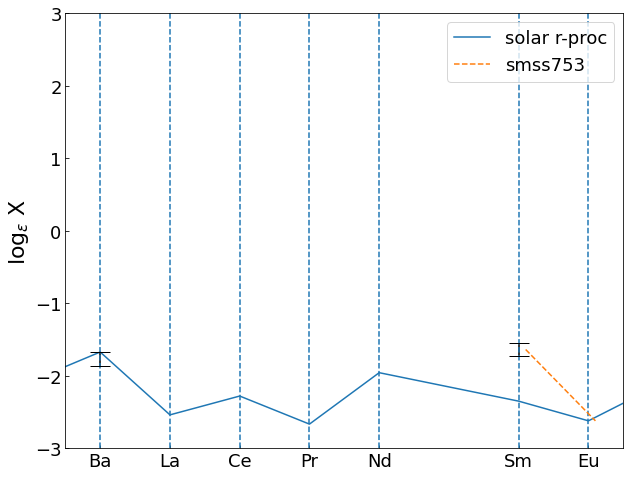

<ipython-input-16-01d5c364d05f>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/eu_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')


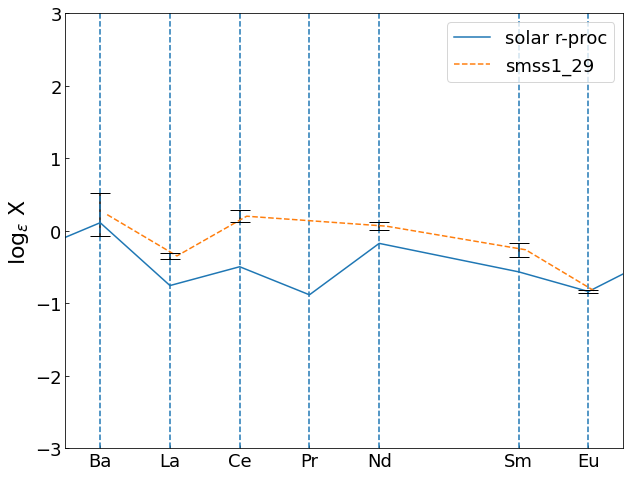

<ipython-input-16-01d5c364d05f>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/eu_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')


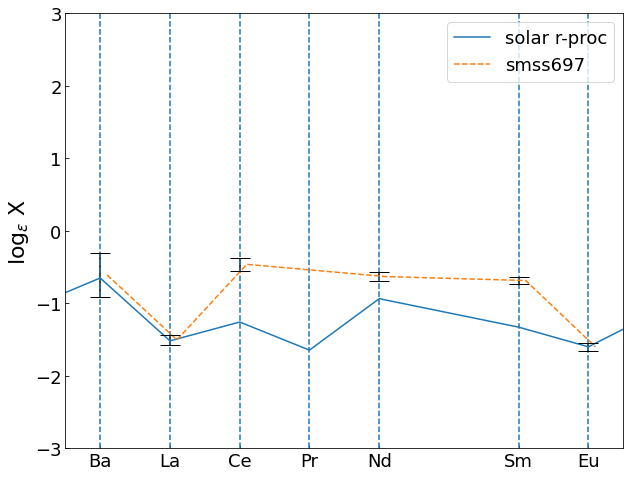

<ipython-input-16-01d5c364d05f>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/eu_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')


In [16]:
# Plot my star with scale shifted based on Eu
for i in range(len(abund_name)):
    plot_elem_range = list(np.arange(11,17))
    f = plt.figure(figsize=[10,8])
    # plt.plot(solar['Z'], solar['eps_s'],label='s-proc')
    # Calculate the shift needed for Ba
    Z_tmp = int(np.array(abund_elem)[16])
    ind_tmp = np.where(solar['Z'] == Z_tmp)[0][0]
    scale_shift = all_eps[16,i]-solar['eps_r'][ind_tmp]
    if np.isnan(scale_shift) == True:
        scale_shift = 0
    plt.plot(solar['Z'], solar['eps_r']+scale_shift,label='solar r-proc')
#     print(scale_shift)
    plt.plot(np.array(abund_elem)[plot_elem_range], all_eps[plot_elem_range,i], label=abund_name[i],ls='--')
    for j in range(len(plot_elem_range)):
        Z_tmp = int(np.array(abund_elem)[plot_elem_range[j]])
        ind_tmp = np.where(solar['Z'] == Z_tmp)[0][0]
        plt.errorbar(Z_tmp, all_eps[plot_elem_range[j],i],yerr=all_eps_std[plot_elem_range[j],i],
                     markersize=10,c='k',capsize=10)
    plt.xticks(solar['Z'], solar['elem'])
    plt.vlines(solar['Z'],-3,3,linestyles='dashed')
    plt.xlim([55.5,63.5])
    plt.ylim([-3,3])
    plt.ylabel(r'$\log_{\epsilon}$ X',fontsize=22)
    plt.legend(fontsize=18)
    plt.show()
    f.savefig('r_proc_pattern/eu_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')

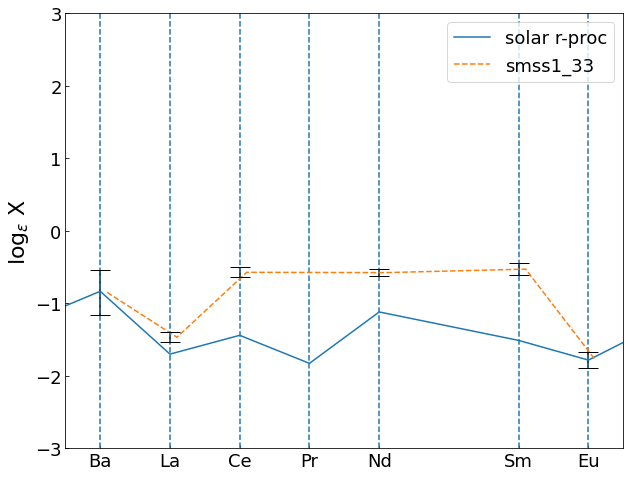

<ipython-input-17-693a67ec40c6>:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/eu_ba_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')


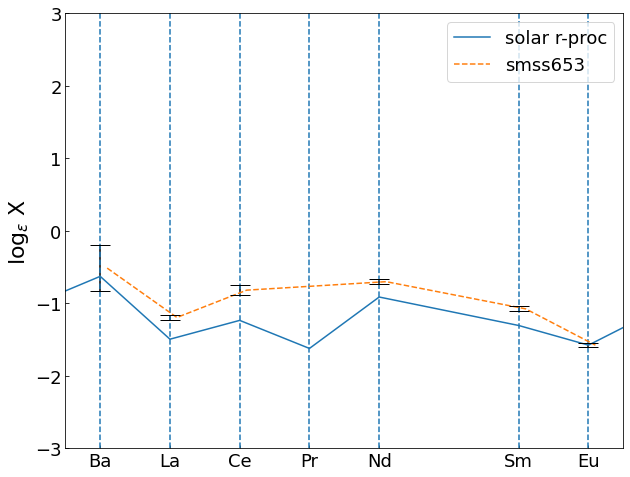

<ipython-input-17-693a67ec40c6>:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/eu_ba_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/pandas_project/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


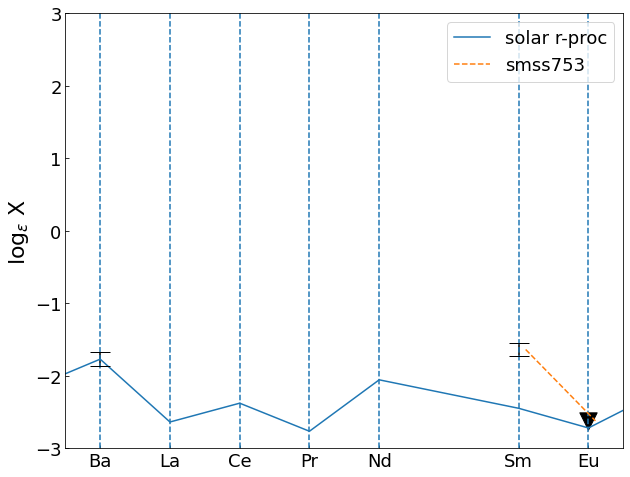

<ipython-input-17-693a67ec40c6>:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/eu_ba_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')


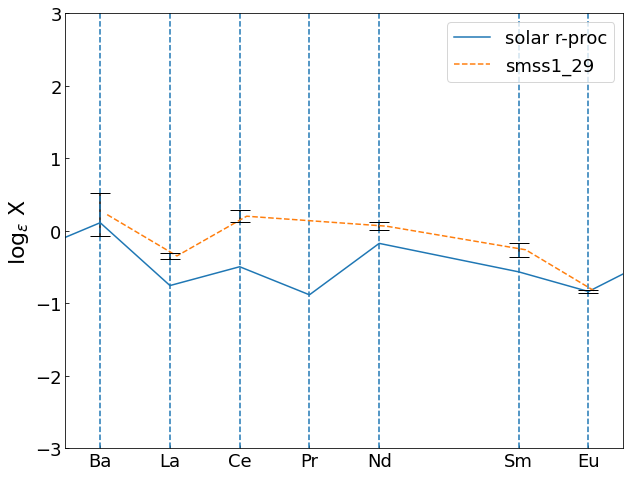

<ipython-input-17-693a67ec40c6>:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/eu_ba_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')


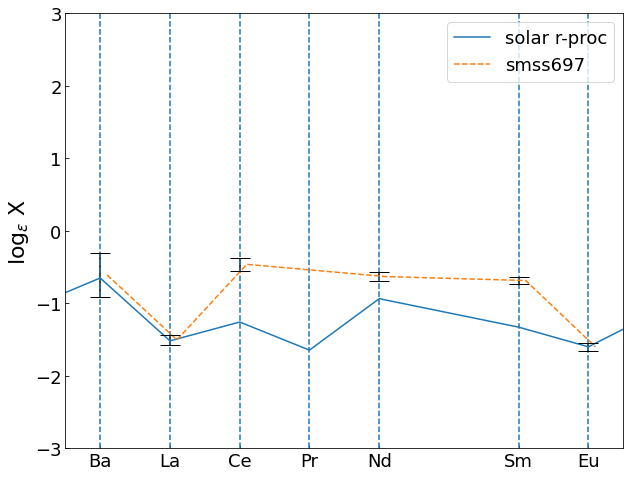

<ipython-input-17-693a67ec40c6>:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('r_proc_pattern/eu_ba_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')


In [17]:
# Plot my star with scale shifted based on Eu, if Eu not available, shift based on Ba
for i in range(len(abund_name)):
    plot_elem_range = list(np.arange(11,17))
    f = plt.figure(figsize=[10,8])
    # plt.plot(solar['Z'], solar['eps_s'],label='s-proc')
    # Calculate the shift needed for Eu
    Z_tmp = int(np.array(abund_elem)[16])
    ind_tmp = np.where(solar['Z'] == Z_tmp)[0][0]
    scale_shift = all_eps[16,i]-solar['eps_r'][ind_tmp]
    if i in smss_mwtd_eu_ul_ind:
        Z_tmp = int(np.array(abund_elem)[11])
        ind_tmp = np.where(solar['Z'] == Z_tmp)[0][0]
        scale_shift = all_eps[11,i]-solar['eps_r'][ind_tmp]
    plt.plot(solar['Z'], solar['eps_r']+scale_shift,label='solar r-proc')
#     print(scale_shift)
    plt.plot(np.array(abund_elem)[plot_elem_range], all_eps[plot_elem_range,i], label=abund_name[i],ls='--')
    for j in range(len(plot_elem_range)):
        Z_tmp = int(np.array(abund_elem)[plot_elem_range[j]])
        ind_tmp = np.where(solar['Z'] == Z_tmp)[0][0]
        if (i in smss_mwtd_eu_ul_ind) and (Z_tmp == 63):
            plt.scatter(Z_tmp, all_eps[plot_elem_range[j],i],s=300,marker='v',c='k')
        else:
            plt.errorbar(Z_tmp, all_eps[plot_elem_range[j],i],yerr=all_eps_std[plot_elem_range[j],i],
                         markersize=10,c='k',capsize=10)
    plt.xticks(solar['Z'], solar['elem'])
    plt.vlines(solar['Z'],-3,3,linestyles='dashed')
    plt.xlim([55.5,63.5])
    plt.ylim([-3,3])
    plt.ylabel(r'$\log_{\epsilon}$ X',fontsize=22)
    plt.legend(fontsize=18)
    plt.show()
    f.savefig('r_proc_pattern/eu_ba_scaled/'+abund_name[i]+'_reselected.pdf',bbox='tight')

In [112]:
barklem2005_halo_xfe['Eu/Fe'].astype('float')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
248   NaN
249   NaN
250   NaN
251   NaN
252   NaN
Name: Eu/Fe, Length: 253, dtype: float64

In [142]:
# Import the Barklem stars 
barklem2005_halo = pd.read_csv('../data/td_lit/barklem2005_halo_logeps.csv',index_col='JINA ID').T.reset_index(drop=True)
barklem2005_halo_xfe = pd.read_csv('../data/td_lit/barklem2005_halo_xfe.csv',index_col='JINA ID').T.reset_index(drop=True)


bk05_logeps_names = np.array(['Mg','Al','Si','Ca','Sc','TiII','Cr',
                     'Mn','Sr','Y','Zr','Ba','La','Ce','Nd','Sm',
                     'Eu','C'])

# Cut out the ones with Eu between 0.0 and 0.5
ind_eu_cut = np.where((barklem2005_halo_xfe['Eu/Fe'].astype('float') > 0.0) & (barklem2005_halo_xfe['Eu/Fe'].astype('float') < 0.5))[0]
print(ind_eu_cut,len(ind_eu_cut))
barklem2005_halo_cut = barklem2005_halo.loc[ind_eu_cut,:]
# barklem2005_halo_cut.loc[14,:]

[ 14  16  33  52  81  84  90  91 111 112 118 119 127 134 142 151 152 154
 170 177 179 181 203 240] 24


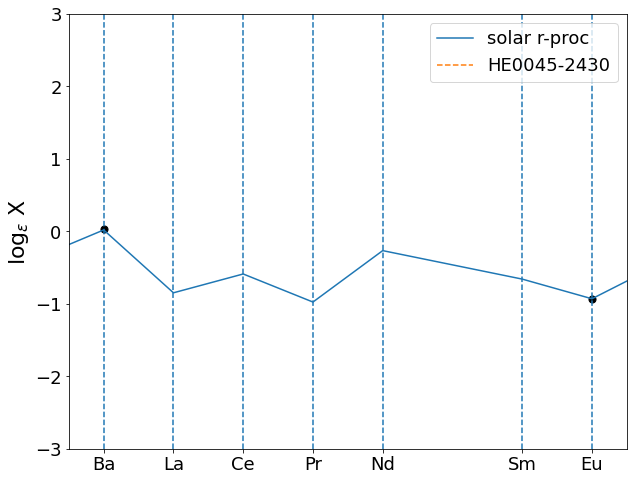

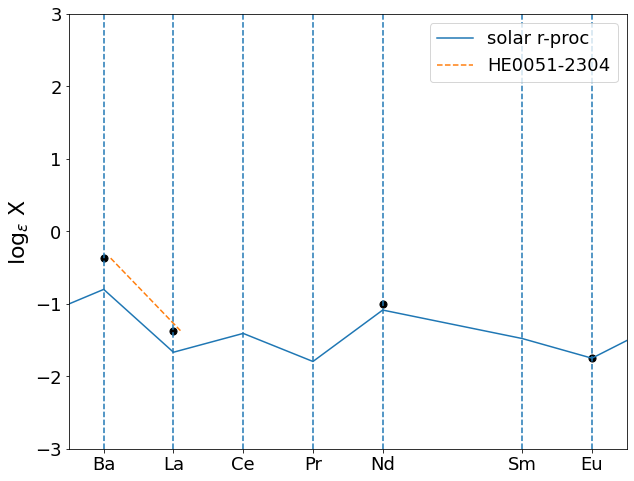

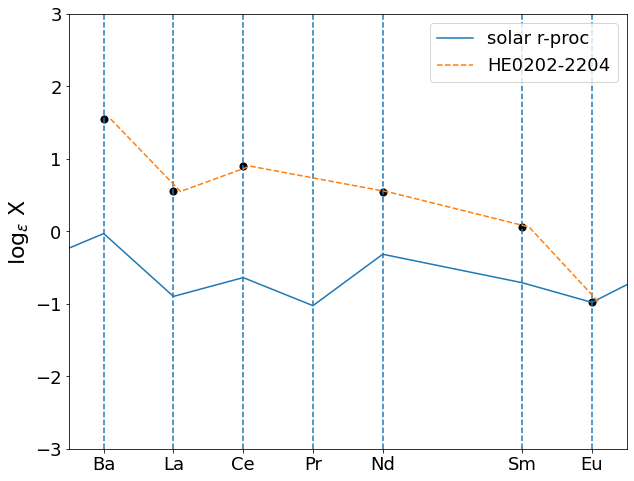

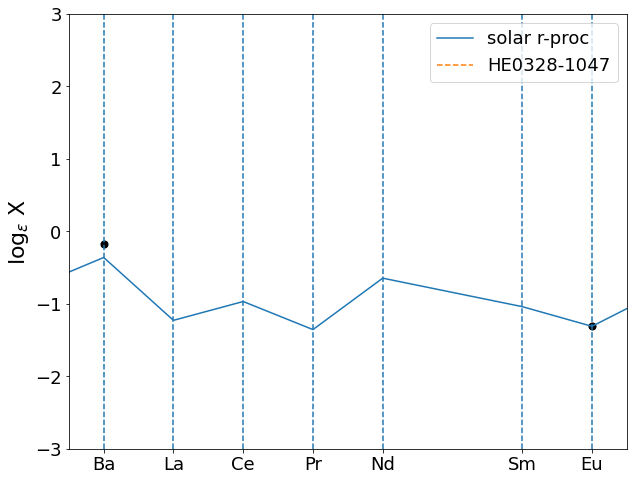

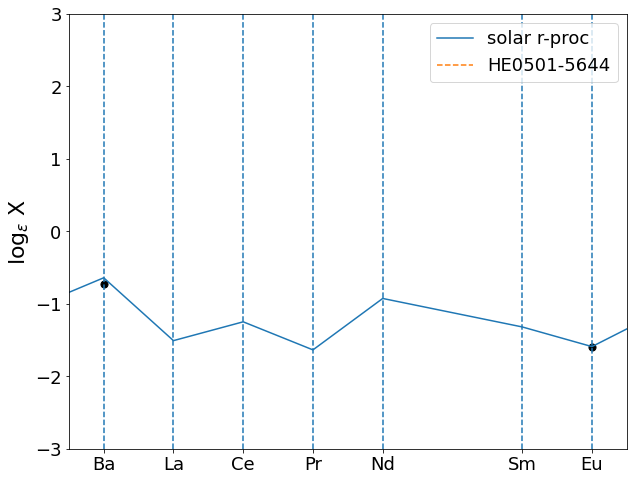

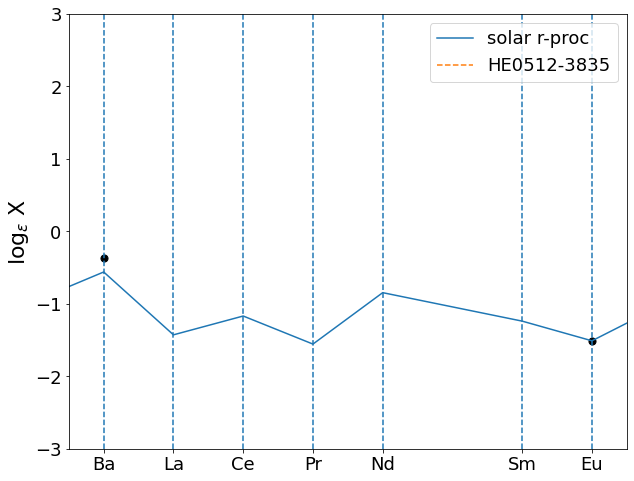

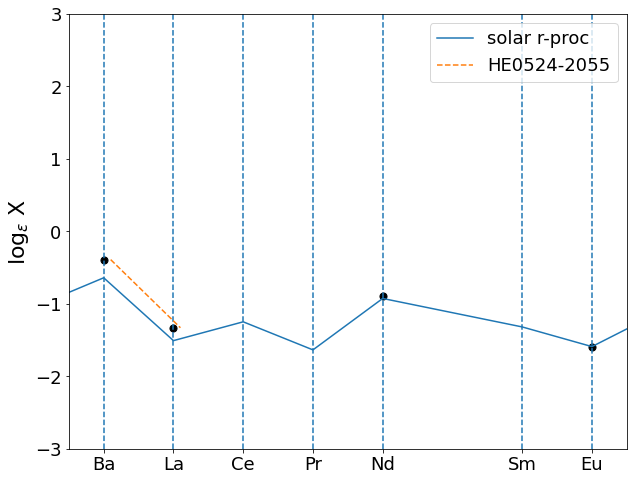

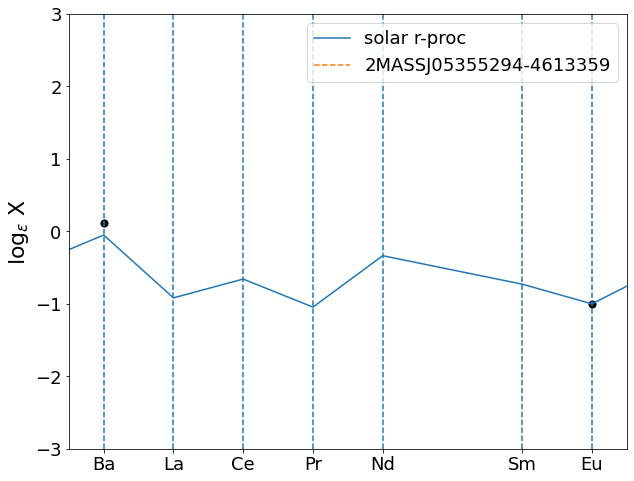

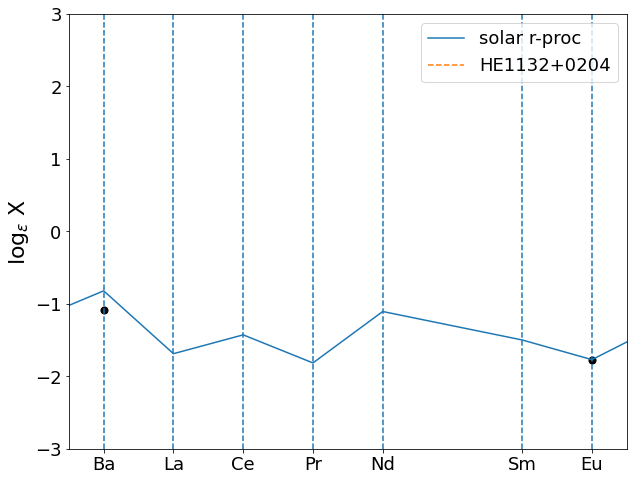

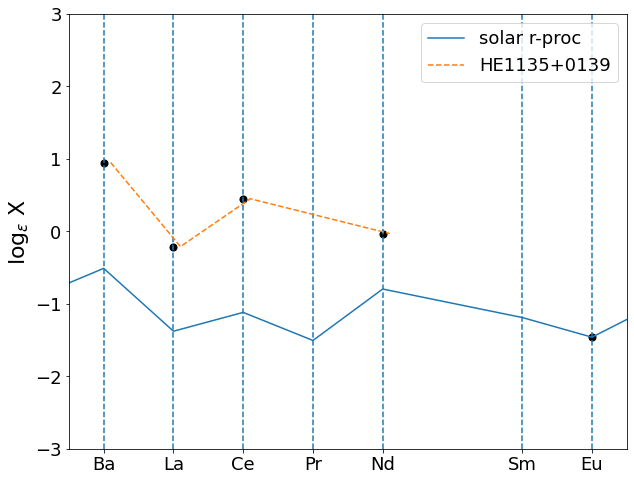

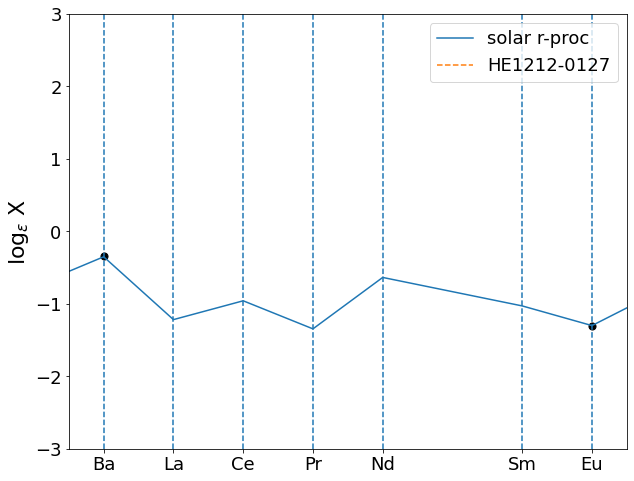

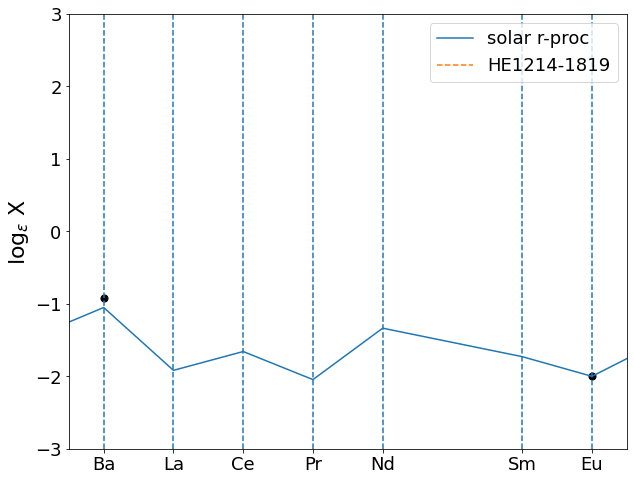

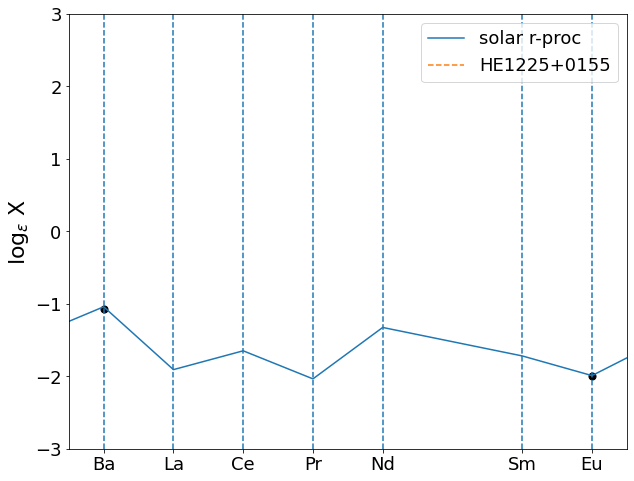

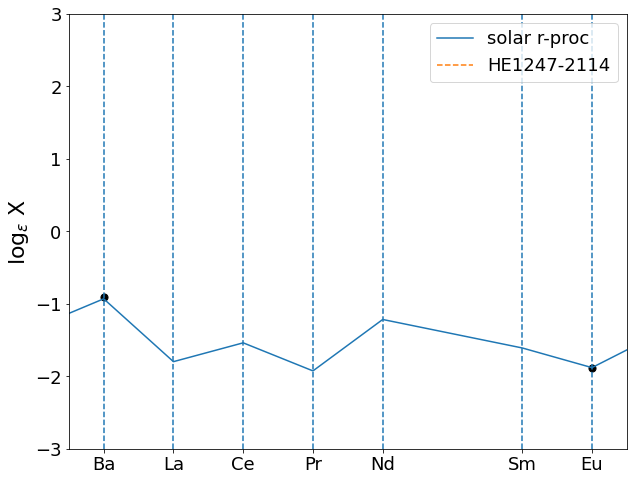

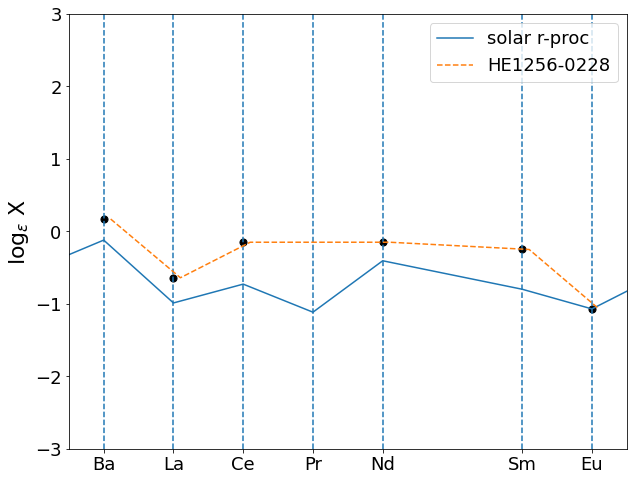

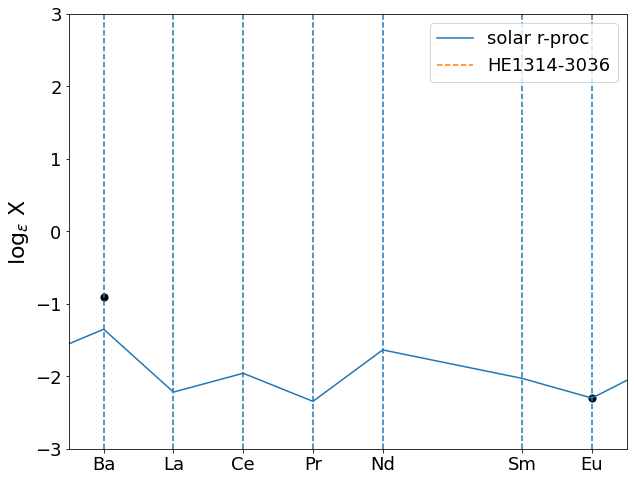

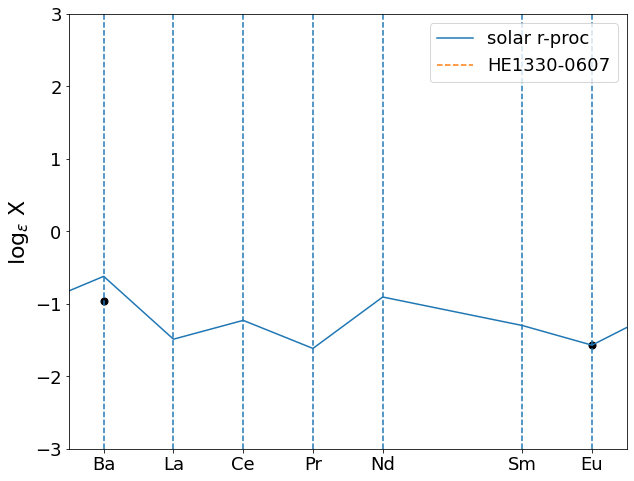

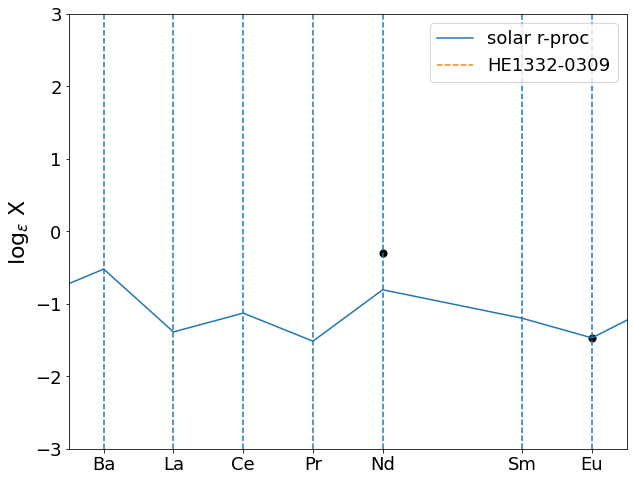

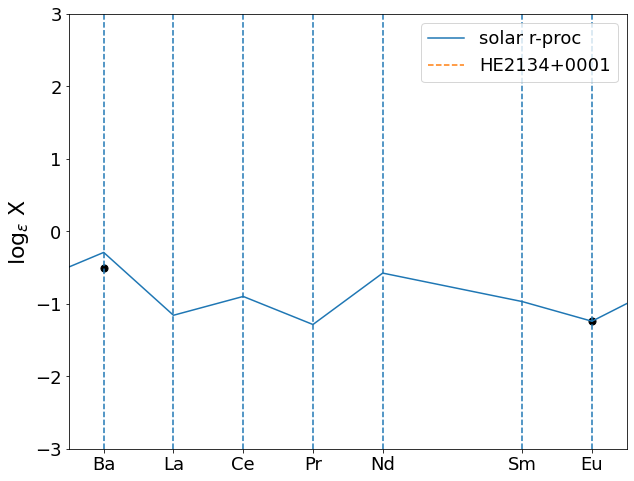

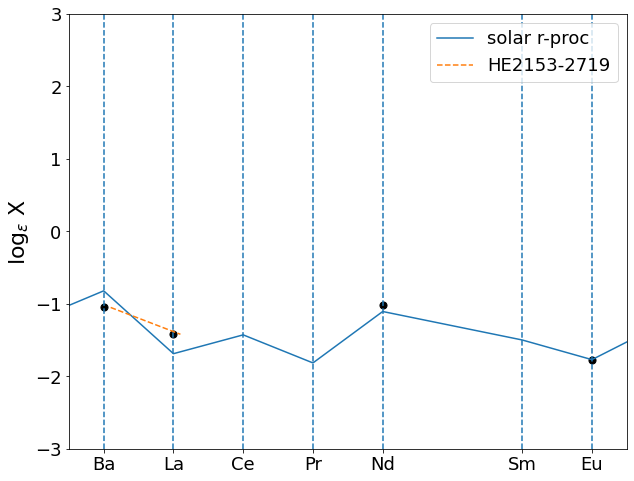

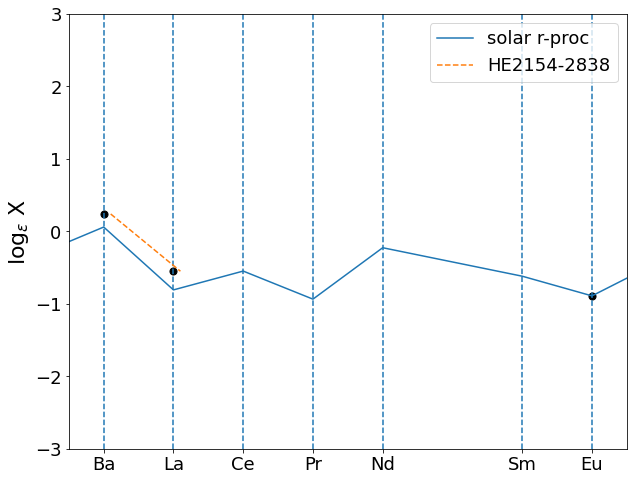

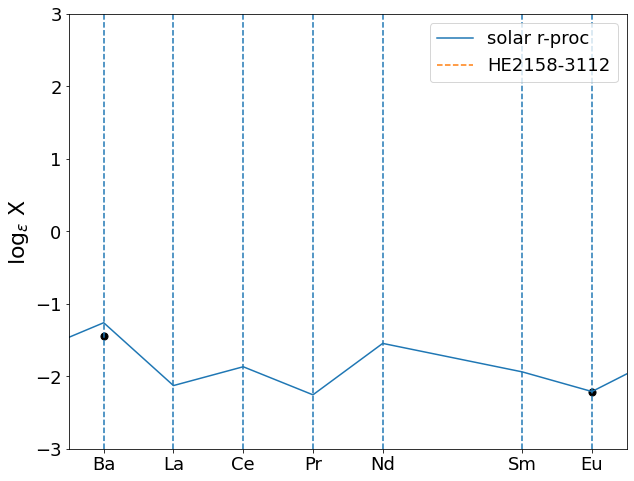

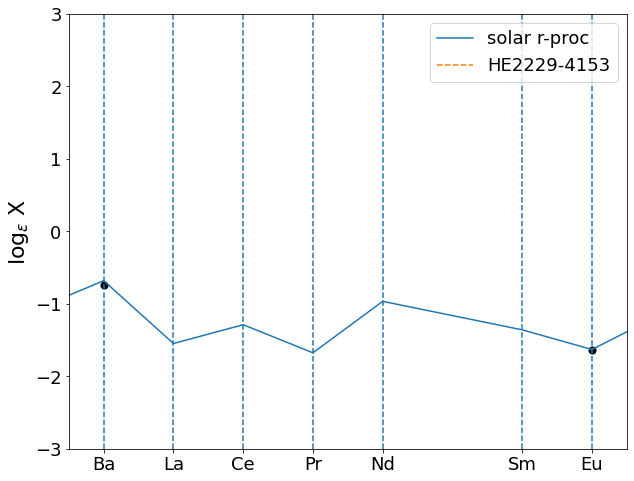

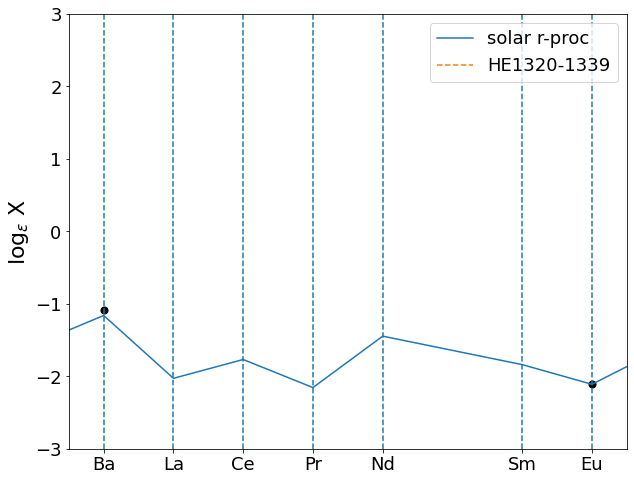

In [141]:
# Plot the Barklem star with scale shifted based on Eu, if Eu not available, shift based on Ba
for i in range(len(barklem2005_halo_cut)):
    plot_elem_range = list(np.arange(11,17))
    f = plt.figure(figsize=[10,8])
    # plt.plot(solar['Z'], solar['eps_s'],label='s-proc')
    # Calculate the shift needed for Eu
    Z_tmp = int(np.array(abund_elem)[16])
    ind_tmp = np.where(solar['Z'] == Z_tmp)[0][0]
    scale_shift = float(barklem2005_halo_cut.loc[ind_eu_cut[i],'Eu'])-solar['eps_r'][ind_tmp]
    plt.plot(solar['Z'], solar['eps_r']+scale_shift,label='solar r-proc')
#     print(scale_shift)
    plt.plot(np.array(abund_elem)[plot_elem_range], barklem2005_halo_cut.loc[ind_eu_cut[i],bk05_logeps_names[plot_elem_range]].astype('float'), 
             label=barklem2005_halo_cut.loc[ind_eu_cut[i],'Name'],ls='--')
    for j in range(len(plot_elem_range)):
        Z_tmp = int(np.array(abund_elem)[plot_elem_range[j]])
        plt.scatter(Z_tmp, float(barklem2005_halo_cut.loc[ind_eu_cut[i],bk05_logeps_names[plot_elem_range[j]]]),
                    s=50,c='k')
    plt.xticks(solar['Z'], solar['elem'])
    plt.vlines(solar['Z'],-3,3,linestyles='dashed')
    plt.xlim([55.5,63.5])
    plt.ylim([-3,3])
    plt.ylabel(r'$\log_{\epsilon}$ X',fontsize=22)
    plt.legend(fontsize=18)
    plt.show()
#     f.savefig('r_proc_pattern/eu_ba_scaled/'+abund_name[i]+'.pdf',bbox='tight')

In [138]:
barklem2005_halo_cut.loc[ind_eu_cut[0],:]

JINA ID
Priority              1
Ref               BAR05
Name        HE0045-2430
C                  6.54
Mg                 5.77
Al                 3.61
Ca                 4.68
Sc                  1.3
Ti                 3.29
V                  2.16
Cr                 3.82
Mn                 3.37
Fe                 5.73
Co                    3
Ni                    4
Zn                 2.81
Sr                 0.46
Y                 -0.13
Zr                 0.93
Ba                 0.03
La                  NaN
Ce                  NaN
Nd                  NaN
Sm                  NaN
Eu                -0.93
Name: 14, dtype: object

In [130]:
plot_elem_range

[11, 12, 13, 14, 15, 16]